In [48]:
'''
Build a suggorate model for the data
there is a DNN models that want to build
if there are 3 dataset, then there are 3 models after training
Example Code : https://www.youtube.com/watch?v=Jy4wM2X21u0&list=PLhhyoLH6IjfxeoooqP9rhU3HJIAVAJ3Vz&index=3
'''

'\nBuild a suggorate model for the data\nthere is a DNN models that want to build\nif there are 3 dataset, then there are 3 models after training\nExample Code : https://www.youtube.com/watch?v=Jy4wM2X21u0&list=PLhhyoLH6IjfxeoooqP9rhU3HJIAVAJ3Vz&index=3\n'

In [49]:
# load csv file and print the first 5 rows
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from tqdm import tqdm  # For nice progress bar!

# Set device cuda for GPU if it's available otherwise run on the CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [50]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

def draw_plot(accuracy_stats, loss_stats):

    # Create dataframes
    train_val_acc_df = pd.DataFrame.from_dict(accuracy_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
    train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})

    # modify column names
    train_val_acc_df.columns = ['epochs', 'status', 'accuracy']
    train_val_loss_df.columns = ['epochs', 'status', 'loss']
    
    # Plot the dataframes
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
    
    # change the limits of y-axis
    axes[0].set_ylim(0.6, 1) 
    axes[1].set_ylim(0, 0.5)
    
    sns.lineplot(data=train_val_acc_df, x = "epochs", y="accuracy", hue="status",  ax=axes[0]).set_title('Train-Val Accuracy/Epoch')
    sns.lineplot(data=train_val_loss_df, x = "epochs", y="loss", hue="status", ax=axes[1]).set_title('Train-Val Loss/Epoch')


In [51]:
from sklearn.metrics import confusion_matrix

# draw confusion matrix
def draw_confusion_matrix(y_test, y_pred, model, model_name, dataset_resource):
    cm = confusion_matrix(y_test, y_pred)
    total = np.sum(cm)
    confusion_percentage = (cm  / total) * 100

    strings = np.asarray([['%', '%'],
                        ['%', '%']])
    labels = (np.asarray(["{1:.2f} %".format(string, confusion_percentage) for string, confusion_percentage in zip(strings.flatten(), confusion_percentage.flatten())])).reshape(2, 2)
    plt.figure(figsize=(8,5))
    sns.heatmap(confusion_percentage, annot=labels, fmt='', cmap=plt.cm.Blues, linewidths=1, xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'], annot_kws={"size": 10})
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.title(f'Confusion Matrix of {model_name} Surrogate Model', fontsize=15)
    # add accuracy
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    plt.text(0.5, 2.5, f'Dataset from: {dataset_resource}', dict(size=12))
    
    plt.show()

In [52]:
train_lr_predicted = pd.read_csv('../datasets/surrogate_model/CICIDS2017/split_dataset/train_lr_predicted.csv')
val_lr_predicted = pd.read_csv('../datasets/surrogate_model/CICIDS2017/split_dataset/val_lr_predicted.csv')
test_lr_predicted = pd.read_csv('../datasets/surrogate_model/CICIDS2017/split_dataset/test_lr_predicted.csv')

train_dt_predicted = pd.read_csv('../datasets/surrogate_model/CICIDS2017/split_dataset/train_dt_predicted.csv')
val_dt_predicted = pd.read_csv('../datasets/surrogate_model/CICIDS2017/split_dataset/val_dt_predicted.csv')
test_dt_predicted = pd.read_csv('../datasets/surrogate_model/CICIDS2017/split_dataset/test_dt_predicted.csv')

train_xgb_predicted = pd.read_csv('../datasets/surrogate_model/CICIDS2017/split_dataset/train_xgb_predicted.csv')
val_xgb_predicted = pd.read_csv('../datasets/surrogate_model/CICIDS2017/split_dataset/val_xgb_predicted.csv')
test_xgb_predicted = pd.read_csv('../datasets/surrogate_model/CICIDS2017/split_dataset/test_xgb_predicted.csv')

train_dnn_predicted = pd.read_csv('../datasets/surrogate_model/CICIDS2017/split_dataset/train_dnn_predicted.csv')
val_dnn_predicted = pd.read_csv('../datasets/surrogate_model/CICIDS2017/split_dataset/val_dnn_predicted.csv')
test_dnn_predicted = pd.read_csv('../datasets/surrogate_model/CICIDS2017/split_dataset/test_dnn_predicted.csv')


X_train_lr_predicted, y_train_lr_predicted = train_lr_predicted.drop(columns=['LR_Predicted'], axis=1), train_lr_predicted['LR_Predicted']
X_val_lr_predicted, y_val_lr_predicted = val_lr_predicted.drop(columns=['LR_Predicted'], axis=1), val_lr_predicted['LR_Predicted']
X_test_lr_predicted, y_test_lr_predicted = test_lr_predicted.drop(columns=['LR_Predicted'], axis=1), test_lr_predicted['LR_Predicted']

X_train_dt_predicted, y_train_dt_predicted = train_dt_predicted.drop(columns=['DT_Predicted'], axis=1), train_dt_predicted['DT_Predicted']
X_val_dt_predicted, y_val_dt_predicted = val_dt_predicted.drop(columns=['DT_Predicted'], axis=1), val_dt_predicted['DT_Predicted']
X_test_dt_predicted, y_test_dt_predicted = test_dt_predicted.drop(columns=['DT_Predicted'], axis=1), test_dt_predicted['DT_Predicted']

X_train_xgb_predicted, y_train_xgb_predicted = train_xgb_predicted.drop(columns=['XGB_Predicted'], axis=1), train_xgb_predicted['XGB_Predicted']
X_val_xgb_predicted, y_val_xgb_predicted = val_xgb_predicted.drop(columns=['XGB_Predicted'], axis=1), val_xgb_predicted['XGB_Predicted']    
X_test_xgb_predicted, y_test_xgb_predicted = test_xgb_predicted.drop(columns=['XGB_Predicted'], axis=1), test_xgb_predicted['XGB_Predicted']

X_train_dnn_predicted, y_train_dnn_predicted = train_dnn_predicted.drop(columns=['DNN_Predicted'], axis=1), train_dnn_predicted['DNN_Predicted']
X_val_dnn_predicted, y_val_dnn_predicted = val_dnn_predicted.drop(columns=['DNN_Predicted'], axis=1), val_dnn_predicted['DNN_Predicted']
X_test_dnn_predicted, y_test_dnn_predicted = test_dnn_predicted.drop(columns=['DNN_Predicted'], axis=1), test_dnn_predicted['DNN_Predicted']


In [53]:
# Hyperparameters
input_size = len(X_train_xgb_predicted.columns) # 42
num_classes = 2
learning_rate = 0.001
batch_size = 64
num_epochs = 50

In [54]:
## create dataloaders by myself
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler

class ClassifierDataset(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)



In [55]:
# Here we create our simple neural network. For more details here we are subclassing and
# inheriting from nn.Module, this is the most general way to create your networks and
# allows for more flexibility. I encourage you to also check out nn.Sequential which
# would be easier to use in this scenario but I wanted to show you something that
# "always" works and is a general approach.
class DNN(nn.Module):
    def __init__(self, input_size, num_classes):
        """
        Here we define the layers of the network. We create two fully connected layers

        Parameters:
            input_size: the size of the input, in this case 784 (28x28)
            num_classes: the number of classes we want to predict, in this case 10 (0-9)

        """
        super(DNN, self).__init__()
        # Our first linear layer take input_size, in this case 784 nodes to 50
        # and our second linear layer takes 50 to the num_classes we have, in
        # this case 10.
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, num_classes)
        # self.fc3 = nn.Linear(128, num_classes)
        self.dropout = nn.Dropout(p=0.5)
        
        self.relu = nn.ReLU()
        self.act3 = nn.Softmax()
        self.batchnorm1 = nn.BatchNorm1d(128)

    def forward(self, x):
        """
        x here is the mnist images and we run it through fc1, fc2 that we created above.
        we also add a ReLU activation function in between and for that (since it has no parameters)
        I recommend using nn.functional (F)

        Parameters:
            x: mnist images

        Returns:
            out: the output of the network
        """

        #x = F.relu(self.fc1(x))
        x = self.fc1(x)
        x = self.batchnorm1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [56]:
# train model for one epoch

def train_for_one_epoch(model, train_loader, val_loader, criterion, optimizer, num_epochs):

     # train model
    train_epoch_loss = 0
    train_epoch_acc = 0
    model.train()
    for batch_idx, (data, targets) in enumerate(tqdm(train_loader)):
        # Get data to cuda if possible
        data = data.to(device=device)
        targets = targets.to(device=device)

        # Get to correct shape
        #data = data.reshape(data.shape[0], -1)

        # Forward
        y_train_pred = model(data)
        
        # train_loss, train_acc per batch
        train_loss = criterion(y_train_pred, targets) 
        train_acc  = (y_train_pred.argmax(1) == targets).float().sum() / len(targets)
        
        # Backward
        optimizer.zero_grad()
        train_loss.backward()

        # Gradient descent or adam step
        optimizer.step()

        train_epoch_loss += train_loss.item()   
        train_epoch_acc += train_acc.item()
    return train_epoch_loss, train_epoch_acc

In [57]:
# test the model

def test_model(loader, model):
    y_pred_list = []
    with torch.no_grad():
        model.eval()
        for X_batch, _ in loader:
            X_batch = X_batch.to(device)
            y_test_pred = model(X_batch)
            _, y_pred_tags = torch.max(y_test_pred, dim = 1)
            #print(_, y_pred_tags.cpu().numpy())
            y_pred_list.append(y_pred_tags.cpu().numpy())
    y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
    return y_pred_list

In [58]:
# Check accuracy on training & test to see how good our model
def check_accuracy(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()

    # We don't need to keep track of gradients here so we wrap it in torch.no_grad()
    with torch.no_grad():
        # Loop through the data
        for x, y in loader:

            # Move data to device
            x = x.to(device=device)
            y = y.to(device=device)

            # Forward pass
            scores = model(x)
            _, predictions = scores.max(1)

            # Check how many we got correct
            num_correct += (predictions == y).sum()

            # Keep track of number of samples
            num_samples += predictions.size(0)

    model.train()
    return num_correct / num_samples

### Train for Logistic Regression Predicted Data

In [59]:

train_dataset = ClassifierDataset(torch.tensor(np.array(X_train_lr_predicted)).float(), torch.tensor(np.array(y_train_lr_predicted)).long())
val_dataset = ClassifierDataset(torch.tensor(np.array(X_val_lr_predicted)).float(), torch.tensor(np.array(y_val_lr_predicted)).long())
test_dataset = ClassifierDataset(torch.tensor(np.array(X_test_lr_predicted)).float(), torch.tensor(np.array(y_test_lr_predicted)).long())

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, drop_last=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=1,drop_last=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=1,drop_last=True)

In [60]:
# Imports
import torch
import torch.nn.functional as F  # Parameterless functions, like (some) activation functions
import torchvision.datasets as datasets  # Standard datasets
import torchvision.transforms as transforms  # Transformations we can perform on our dataset for augmentation
from torch import optim  # For optimizers like SGD, Adam, etc.
from torch import nn  # All neural network modules
from torch.utils.data import (
    DataLoader,
)  # Gives easier dataset managment by creating mini batches etc.
from tqdm import tqdm  # For nice progress bar!
from datetime import datetime


# Initialize network
model = DNN(input_size=input_size, num_classes=num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# accuracy, loss status for each epoch
accuracy_stats = {
    'train': [],
    "val": []
}
loss_stats = {
    'train': [],
    "val": []
}


print("Begin training.")
best_vloss = 1000000
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
# Train Network
for epoch in range(num_epochs):
    
    # train model
    train_epoch_loss, train_epoch_acc = train_for_one_epoch(model, train_loader, val_loader, criterion, optimizer, num_epochs)
        
    # validate model
    with torch.no_grad():
        val_epoch_loss = 0
        val_epoch_acc = 0
        
        model.eval()
        for i, vdata in enumerate(val_loader):
            vinputs, vlabels = vdata
            voutputs = model(vinputs)
            val_loss = criterion(voutputs, vlabels)
            val_acc = (voutputs.argmax(1) == vlabels).float().sum() / len(vlabels)
            
            val_epoch_loss += val_loss.item()
            val_epoch_acc += val_acc.item()
    avg_vloss = val_epoch_loss/len(val_loader)


    # save the accuracy and loss for each epoch   
    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    loss_stats['val'].append(val_epoch_loss/len(val_loader))
    accuracy_stats['train'].append(train_epoch_acc/len(train_loader))
    accuracy_stats['val'].append(val_epoch_acc/len(val_loader))
    
    # Track best performance, and save the model's state
    if avg_vloss < best_vloss:
        best_vloss = avg_vloss
        model_path = '../surrogate_model/surrogate_DNN_model/surrogateDNN_model_fromLR_{}_{}'.format(timestamp, epoch) # target_model\target_DNN_model\binaryclass
        torch.save(model.state_dict(), model_path)                           
        torch.save(model, model_path + '.pth')    
        
    print(f'Epoch {epoch + 1}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f} | Train Acc: {train_epoch_acc/len(train_loader):.4f}| Val Acc: {val_epoch_acc/len(val_loader):.4f}')

        

# Check accuracy on training & test to see how good our model
def check_accuracy(loader, model):
    """
    Check accuracy of our trained model given a loader and a model

    Parameters:
        loader: torch.utils.data.DataLoader
            A loader for the dataset you want to check accuracy on
        model: nn.Module
            The model you want to check accuracy on

    Returns:
        acc: float
            The accuracy of the model on the dataset given by the loader
    """

    num_correct = 0
    num_samples = 0
    model.eval()

    # We don't need to keep track of gradients here so we wrap it in torch.no_grad()
    with torch.no_grad():
        # Loop through the data
        for x, y in loader:

            # Move data to device
            x = x.to(device=device)
            y = y.to(device=device)

            # Get to correct shape
           # x = x.reshape(x.shape[0], -1)

            # Forward pass
            scores = model(x)
            _, predictions = scores.max(1)

            # Check how many we got correct
            num_correct += (predictions == y).sum()

            # Keep track of number of samples
            num_samples += predictions.size(0)

    model.train()
    return num_correct / num_samples


# Check accuracy on training & test to see how good our model
print(f"Accuracy on training set: {check_accuracy(train_loader, model)*100:.2f}")
print(f"Accuracy on test set: {check_accuracy(test_loader, model)*100:.2f}")


Begin training.


100%|██████████| 1354/1354 [00:02<00:00, 579.56it/s]


Epoch 1: | Train Loss: 0.13411 | Val Loss: 0.10334 | Train Acc: 0.9625| Val Acc: 0.9691


100%|██████████| 1354/1354 [00:02<00:00, 616.21it/s]


Epoch 2: | Train Loss: 0.11119 | Val Loss: 0.09819 | Train Acc: 0.9677| Val Acc: 0.9675


100%|██████████| 1354/1354 [00:02<00:00, 584.03it/s]


Epoch 3: | Train Loss: 0.10516 | Val Loss: 0.09181 | Train Acc: 0.9683| Val Acc: 0.9672


100%|██████████| 1354/1354 [00:02<00:00, 616.36it/s]


Epoch 4: | Train Loss: 0.10161 | Val Loss: 0.08632 | Train Acc: 0.9691| Val Acc: 0.9744


100%|██████████| 1354/1354 [00:02<00:00, 585.39it/s]


Epoch 5: | Train Loss: 0.09835 | Val Loss: 0.08412 | Train Acc: 0.9694| Val Acc: 0.9673


100%|██████████| 1354/1354 [00:02<00:00, 591.02it/s]


Epoch 6: | Train Loss: 0.09638 | Val Loss: 0.08189 | Train Acc: 0.9700| Val Acc: 0.9679


100%|██████████| 1354/1354 [00:02<00:00, 622.45it/s]


Epoch 7: | Train Loss: 0.09387 | Val Loss: 0.07735 | Train Acc: 0.9704| Val Acc: 0.9690


100%|██████████| 1354/1354 [00:02<00:00, 604.80it/s]


Epoch 8: | Train Loss: 0.09247 | Val Loss: 0.07782 | Train Acc: 0.9707| Val Acc: 0.9674


100%|██████████| 1354/1354 [00:02<00:00, 623.54it/s]


Epoch 9: | Train Loss: 0.09073 | Val Loss: 0.07492 | Train Acc: 0.9714| Val Acc: 0.9682


100%|██████████| 1354/1354 [00:02<00:00, 621.46it/s]


Epoch 10: | Train Loss: 0.09042 | Val Loss: 0.07285 | Train Acc: 0.9712| Val Acc: 0.9684


100%|██████████| 1354/1354 [00:02<00:00, 626.27it/s]


Epoch 11: | Train Loss: 0.08859 | Val Loss: 0.07101 | Train Acc: 0.9717| Val Acc: 0.9702


100%|██████████| 1354/1354 [00:02<00:00, 617.62it/s]


Epoch 12: | Train Loss: 0.08768 | Val Loss: 0.06921 | Train Acc: 0.9722| Val Acc: 0.9741


100%|██████████| 1354/1354 [00:02<00:00, 614.20it/s]


Epoch 13: | Train Loss: 0.08526 | Val Loss: 0.06776 | Train Acc: 0.9725| Val Acc: 0.9746


100%|██████████| 1354/1354 [00:02<00:00, 592.84it/s]


Epoch 14: | Train Loss: 0.08686 | Val Loss: 0.06803 | Train Acc: 0.9727| Val Acc: 0.9753


100%|██████████| 1354/1354 [00:02<00:00, 628.29it/s]


Epoch 15: | Train Loss: 0.08513 | Val Loss: 0.06769 | Train Acc: 0.9731| Val Acc: 0.9684


100%|██████████| 1354/1354 [00:02<00:00, 620.00it/s]


Epoch 16: | Train Loss: 0.08323 | Val Loss: 0.06657 | Train Acc: 0.9735| Val Acc: 0.9751


100%|██████████| 1354/1354 [00:02<00:00, 607.15it/s]


Epoch 17: | Train Loss: 0.08288 | Val Loss: 0.06514 | Train Acc: 0.9738| Val Acc: 0.9760


100%|██████████| 1354/1354 [00:02<00:00, 620.75it/s]


Epoch 18: | Train Loss: 0.08318 | Val Loss: 0.06606 | Train Acc: 0.9737| Val Acc: 0.9743


100%|██████████| 1354/1354 [00:02<00:00, 611.97it/s]


Epoch 19: | Train Loss: 0.08330 | Val Loss: 0.06575 | Train Acc: 0.9741| Val Acc: 0.9749


100%|██████████| 1354/1354 [00:02<00:00, 586.14it/s]


Epoch 20: | Train Loss: 0.08243 | Val Loss: 0.06344 | Train Acc: 0.9742| Val Acc: 0.9755


100%|██████████| 1354/1354 [00:02<00:00, 608.83it/s]


Epoch 21: | Train Loss: 0.08151 | Val Loss: 0.06345 | Train Acc: 0.9741| Val Acc: 0.9769


100%|██████████| 1354/1354 [00:02<00:00, 597.05it/s]


Epoch 22: | Train Loss: 0.08066 | Val Loss: 0.06398 | Train Acc: 0.9745| Val Acc: 0.9753


100%|██████████| 1354/1354 [00:02<00:00, 612.12it/s]


Epoch 23: | Train Loss: 0.08139 | Val Loss: 0.06280 | Train Acc: 0.9741| Val Acc: 0.9751


100%|██████████| 1354/1354 [00:02<00:00, 604.66it/s]


Epoch 24: | Train Loss: 0.08046 | Val Loss: 0.06328 | Train Acc: 0.9743| Val Acc: 0.9754


100%|██████████| 1354/1354 [00:02<00:00, 643.70it/s]


Epoch 25: | Train Loss: 0.08093 | Val Loss: 0.06136 | Train Acc: 0.9749| Val Acc: 0.9751


100%|██████████| 1354/1354 [00:02<00:00, 612.81it/s]


Epoch 26: | Train Loss: 0.08089 | Val Loss: 0.06374 | Train Acc: 0.9745| Val Acc: 0.9753


100%|██████████| 1354/1354 [00:02<00:00, 618.83it/s]


Epoch 27: | Train Loss: 0.07953 | Val Loss: 0.06109 | Train Acc: 0.9748| Val Acc: 0.9747


100%|██████████| 1354/1354 [00:02<00:00, 626.67it/s]


Epoch 28: | Train Loss: 0.07996 | Val Loss: 0.05958 | Train Acc: 0.9751| Val Acc: 0.9761


100%|██████████| 1354/1354 [00:02<00:00, 629.04it/s]


Epoch 29: | Train Loss: 0.08007 | Val Loss: 0.06126 | Train Acc: 0.9750| Val Acc: 0.9755


100%|██████████| 1354/1354 [00:02<00:00, 643.85it/s]


Epoch 30: | Train Loss: 0.07997 | Val Loss: 0.06136 | Train Acc: 0.9750| Val Acc: 0.9760


100%|██████████| 1354/1354 [00:02<00:00, 643.83it/s]


Epoch 31: | Train Loss: 0.07803 | Val Loss: 0.06165 | Train Acc: 0.9752| Val Acc: 0.9748


100%|██████████| 1354/1354 [00:02<00:00, 630.36it/s]


Epoch 32: | Train Loss: 0.07891 | Val Loss: 0.06080 | Train Acc: 0.9751| Val Acc: 0.9754


100%|██████████| 1354/1354 [00:02<00:00, 633.89it/s]


Epoch 33: | Train Loss: 0.07699 | Val Loss: 0.05908 | Train Acc: 0.9762| Val Acc: 0.9753


100%|██████████| 1354/1354 [00:02<00:00, 624.38it/s]


Epoch 34: | Train Loss: 0.07893 | Val Loss: 0.06140 | Train Acc: 0.9757| Val Acc: 0.9750


100%|██████████| 1354/1354 [00:02<00:00, 617.00it/s]


Epoch 35: | Train Loss: 0.07799 | Val Loss: 0.05902 | Train Acc: 0.9754| Val Acc: 0.9748


100%|██████████| 1354/1354 [00:02<00:00, 626.42it/s]


Epoch 36: | Train Loss: 0.07780 | Val Loss: 0.05938 | Train Acc: 0.9756| Val Acc: 0.9755


100%|██████████| 1354/1354 [00:02<00:00, 635.24it/s]


Epoch 37: | Train Loss: 0.07816 | Val Loss: 0.06016 | Train Acc: 0.9757| Val Acc: 0.9760


100%|██████████| 1354/1354 [00:02<00:00, 647.08it/s]


Epoch 38: | Train Loss: 0.07759 | Val Loss: 0.05881 | Train Acc: 0.9757| Val Acc: 0.9753


100%|██████████| 1354/1354 [00:02<00:00, 633.46it/s]


Epoch 39: | Train Loss: 0.07742 | Val Loss: 0.05925 | Train Acc: 0.9753| Val Acc: 0.9758


100%|██████████| 1354/1354 [00:02<00:00, 625.84it/s]


Epoch 40: | Train Loss: 0.07703 | Val Loss: 0.05991 | Train Acc: 0.9757| Val Acc: 0.9753


100%|██████████| 1354/1354 [00:02<00:00, 616.66it/s]


Epoch 41: | Train Loss: 0.07695 | Val Loss: 0.05911 | Train Acc: 0.9754| Val Acc: 0.9764


100%|██████████| 1354/1354 [00:02<00:00, 598.18it/s]


Epoch 42: | Train Loss: 0.07664 | Val Loss: 0.05817 | Train Acc: 0.9761| Val Acc: 0.9763


100%|██████████| 1354/1354 [00:02<00:00, 577.50it/s]


Epoch 43: | Train Loss: 0.07682 | Val Loss: 0.05877 | Train Acc: 0.9765| Val Acc: 0.9754


100%|██████████| 1354/1354 [00:02<00:00, 582.88it/s]


Epoch 44: | Train Loss: 0.07912 | Val Loss: 0.06011 | Train Acc: 0.9760| Val Acc: 0.9751


100%|██████████| 1354/1354 [00:02<00:00, 615.97it/s]


Epoch 45: | Train Loss: 0.07616 | Val Loss: 0.06013 | Train Acc: 0.9766| Val Acc: 0.9754


100%|██████████| 1354/1354 [00:02<00:00, 612.20it/s]


Epoch 46: | Train Loss: 0.07517 | Val Loss: 0.06004 | Train Acc: 0.9764| Val Acc: 0.9754


100%|██████████| 1354/1354 [00:02<00:00, 624.40it/s]


Epoch 47: | Train Loss: 0.07576 | Val Loss: 0.06033 | Train Acc: 0.9769| Val Acc: 0.9755


100%|██████████| 1354/1354 [00:02<00:00, 622.97it/s]


Epoch 48: | Train Loss: 0.07519 | Val Loss: 0.05886 | Train Acc: 0.9764| Val Acc: 0.9752


100%|██████████| 1354/1354 [00:02<00:00, 624.30it/s]


Epoch 49: | Train Loss: 0.07448 | Val Loss: 0.05822 | Train Acc: 0.9765| Val Acc: 0.9760


100%|██████████| 1354/1354 [00:02<00:00, 597.89it/s]


Epoch 50: | Train Loss: 0.07628 | Val Loss: 0.06016 | Train Acc: 0.9760| Val Acc: 0.9762
Accuracy on training set: 97.45
Accuracy on test set: 97.49


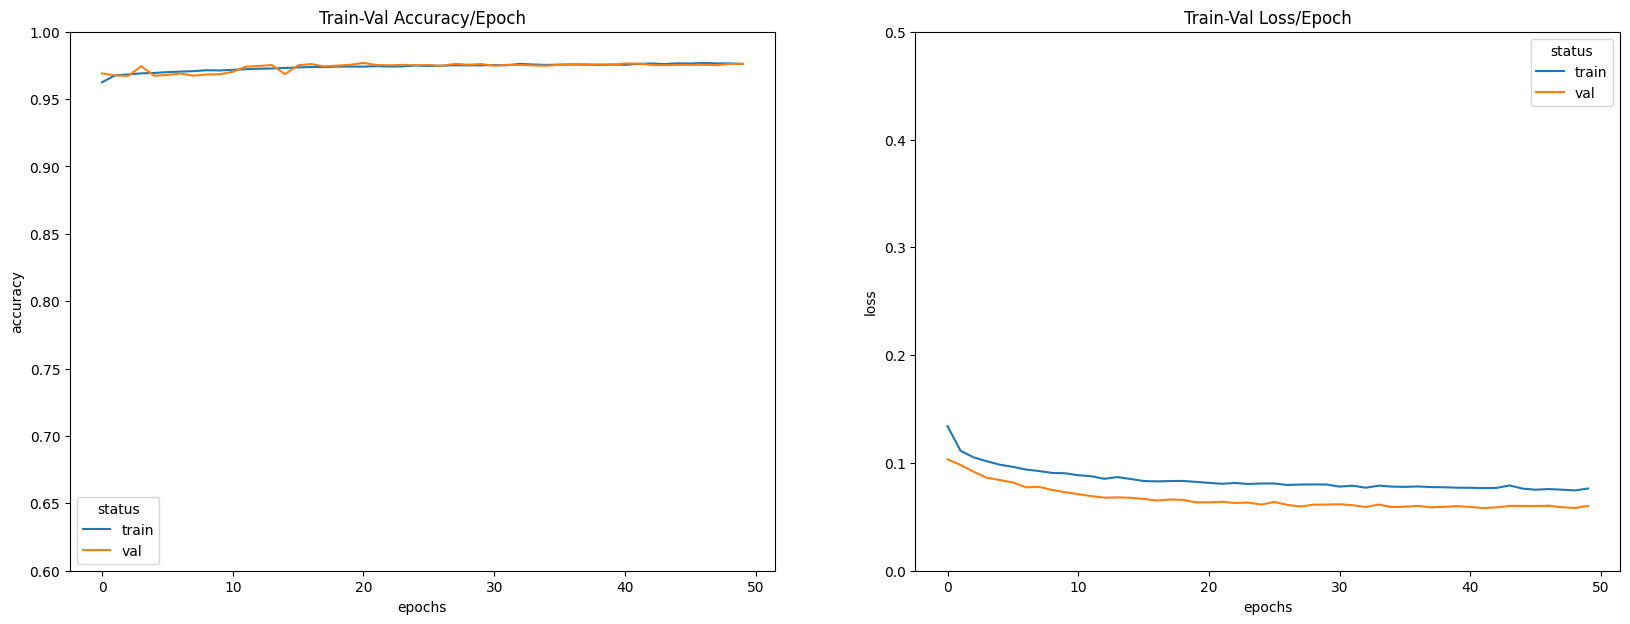

In [61]:
# Draw the plot
draw_plot(accuracy_stats, loss_stats)

# Test the model
y_pred_list = test_model(test_loader, model)

In [62]:
# test accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("accuracy of test data: ", accuracy_score(y_test_lr_predicted, y_pred_list))
print(classification_report(y_test_lr_predicted, y_pred_list, target_names=['Benign', 'Malicious'], digits=4))

accuracy of test data:  0.9748806310981939
              precision    recall  f1-score   support

      Benign     0.9794    0.9938    0.9866     22370
   Malicious     0.9004    0.7277    0.8049      1715

    accuracy                         0.9749     24085
   macro avg     0.9399    0.8608    0.8957     24085
weighted avg     0.9738    0.9749    0.9736     24085



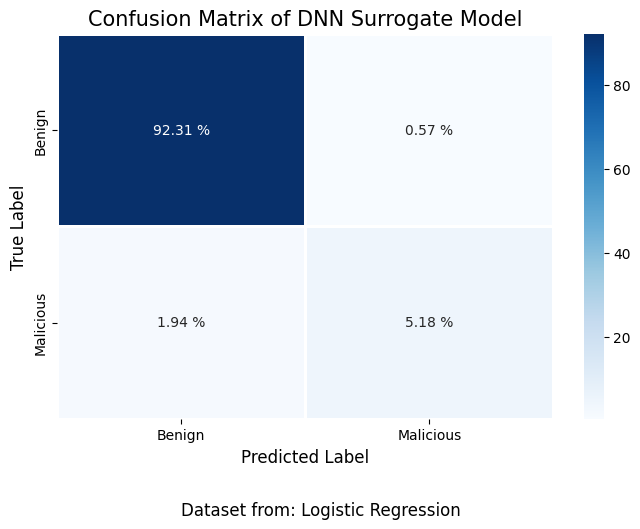

In [63]:
# draw confusion matrix
draw_confusion_matrix(y_test_lr_predicted, y_pred_list, model, 'DNN', 'Logistic Regression')

### Train for Decision Tree Predicted Data

In [64]:
train_dataset = ClassifierDataset(torch.tensor(np.array(X_train_dt_predicted)).float(), torch.tensor(np.array(y_train_dt_predicted)).long())
val_dataset = ClassifierDataset(torch.tensor(np.array(X_val_dt_predicted)).float(), torch.tensor(np.array(y_val_dt_predicted)).long())
test_dataset = ClassifierDataset(torch.tensor(np.array(X_test_dt_predicted)).float(), torch.tensor(np.array(y_test_dt_predicted)).long())

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, drop_last=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=1,drop_last=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=1,drop_last=True)

In [65]:
# Imports
import torch
import torch.nn.functional as F  # Parameterless functions, like (some) activation functions
import torchvision.datasets as datasets  # Standard datasets
import torchvision.transforms as transforms  # Transformations we can perform on our dataset for augmentation
from torch import optim  # For optimizers like SGD, Adam, etc.
from torch import nn  # All neural network modules
from torch.utils.data import (
    DataLoader,
)  # Gives easier dataset managment by creating mini batches etc.
from tqdm import tqdm  # For nice progress bar!
from datetime import datetime


# Initialize network
model = DNN(input_size=input_size, num_classes=num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# accuracy, loss status for each epoch
accuracy_stats = {
    'train': [],
    "val": []
}
loss_stats = {
    'train': [],
    "val": []
}

print("Begin training.")
best_vloss = 1000000
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
# Train Network
for epoch in range(num_epochs):
    # train model
    train_epoch_loss, train_epoch_acc = train_for_one_epoch(model, train_loader, val_loader, criterion, optimizer, num_epochs)

    # validate model
    with torch.no_grad():
        val_epoch_loss = 0
        val_epoch_acc = 0
        model.eval()
        for i, vdata in enumerate(val_loader):
            vinputs, vlabels = vdata
            voutputs = model(vinputs)
            val_loss = criterion(voutputs, vlabels)
            val_acc = (voutputs.argmax(1) == vlabels).float().sum() / len(vlabels)
            
            val_epoch_loss += val_loss.item()
            val_epoch_acc += val_acc.item()
    avg_vloss = val_epoch_loss/len(val_loader)


    # save the accuracy and loss for each epoch   
    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    loss_stats['val'].append(val_epoch_loss/len(val_loader))
    accuracy_stats['train'].append(train_epoch_acc/len(train_loader))
    accuracy_stats['val'].append(val_epoch_acc/len(val_loader))
    
    # Track best performance, and save the model's state
    if avg_vloss < best_vloss:
        best_vloss = avg_vloss
        model_path = '../surrogate_model/surrogate_DNN_model/surrogateDNN_model_fromDT_{}_{}'.format(timestamp, epoch) # target_model\target_DNN_model\binaryclass
        torch.save(model.state_dict(), model_path)                           
        torch.save(model, model_path + '.pth')    
        
    print(f'Epoch {epoch + 1}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f} | Train Acc: {train_epoch_acc/len(train_loader):.4f}| Val Acc: {val_epoch_acc/len(val_loader):.4f}')


# Check accuracy on training & test to see how good our model
print(f"Accuracy on training set: {check_accuracy(train_loader, model)*100:.2f}")
print(f"Accuracy on test set: {check_accuracy(test_loader, model)*100:.2f}")

Begin training.


  0%|          | 0/1354 [00:00<?, ?it/s]

100%|██████████| 1354/1354 [00:02<00:00, 605.00it/s]


Epoch 1: | Train Loss: 0.14651 | Val Loss: 0.11830 | Train Acc: 0.9658| Val Acc: 0.9679


100%|██████████| 1354/1354 [00:02<00:00, 560.13it/s]


Epoch 2: | Train Loss: 0.12468 | Val Loss: 0.11590 | Train Acc: 0.9684| Val Acc: 0.9677


100%|██████████| 1354/1354 [00:02<00:00, 601.22it/s]


Epoch 3: | Train Loss: 0.12093 | Val Loss: 0.11702 | Train Acc: 0.9690| Val Acc: 0.9674


100%|██████████| 1354/1354 [00:02<00:00, 608.56it/s]


Epoch 4: | Train Loss: 0.11937 | Val Loss: 0.11406 | Train Acc: 0.9694| Val Acc: 0.9709


100%|██████████| 1354/1354 [00:02<00:00, 630.05it/s]


Epoch 5: | Train Loss: 0.11701 | Val Loss: 0.11676 | Train Acc: 0.9698| Val Acc: 0.9681


100%|██████████| 1354/1354 [00:02<00:00, 627.18it/s]


Epoch 6: | Train Loss: 0.11555 | Val Loss: 0.11618 | Train Acc: 0.9702| Val Acc: 0.9674


100%|██████████| 1354/1354 [00:02<00:00, 619.47it/s]


Epoch 7: | Train Loss: 0.11505 | Val Loss: 0.11629 | Train Acc: 0.9708| Val Acc: 0.9663


100%|██████████| 1354/1354 [00:02<00:00, 630.83it/s]


Epoch 8: | Train Loss: 0.11545 | Val Loss: 0.11583 | Train Acc: 0.9704| Val Acc: 0.9667


100%|██████████| 1354/1354 [00:02<00:00, 631.25it/s]


Epoch 9: | Train Loss: 0.11503 | Val Loss: 0.11787 | Train Acc: 0.9707| Val Acc: 0.9680


100%|██████████| 1354/1354 [00:02<00:00, 627.44it/s]


Epoch 10: | Train Loss: 0.11345 | Val Loss: 0.11554 | Train Acc: 0.9709| Val Acc: 0.9664


100%|██████████| 1354/1354 [00:02<00:00, 614.54it/s]


Epoch 11: | Train Loss: 0.11267 | Val Loss: 0.11556 | Train Acc: 0.9712| Val Acc: 0.9668


100%|██████████| 1354/1354 [00:02<00:00, 626.42it/s]


Epoch 12: | Train Loss: 0.11322 | Val Loss: 0.11544 | Train Acc: 0.9707| Val Acc: 0.9666


100%|██████████| 1354/1354 [00:02<00:00, 630.34it/s]


Epoch 13: | Train Loss: 0.11282 | Val Loss: 0.11458 | Train Acc: 0.9708| Val Acc: 0.9696


100%|██████████| 1354/1354 [00:02<00:00, 610.56it/s]


Epoch 14: | Train Loss: 0.11141 | Val Loss: 0.11581 | Train Acc: 0.9713| Val Acc: 0.9661


100%|██████████| 1354/1354 [00:02<00:00, 630.78it/s]


Epoch 15: | Train Loss: 0.11099 | Val Loss: 0.11473 | Train Acc: 0.9712| Val Acc: 0.9672


100%|██████████| 1354/1354 [00:02<00:00, 622.70it/s]


Epoch 16: | Train Loss: 0.11150 | Val Loss: 0.11864 | Train Acc: 0.9718| Val Acc: 0.9651


100%|██████████| 1354/1354 [00:02<00:00, 629.92it/s]


Epoch 17: | Train Loss: 0.11099 | Val Loss: 0.12080 | Train Acc: 0.9714| Val Acc: 0.9649


100%|██████████| 1354/1354 [00:02<00:00, 621.42it/s]


Epoch 18: | Train Loss: 0.11111 | Val Loss: 0.11501 | Train Acc: 0.9712| Val Acc: 0.9688


100%|██████████| 1354/1354 [00:02<00:00, 618.33it/s]


Epoch 19: | Train Loss: 0.11119 | Val Loss: 0.11740 | Train Acc: 0.9711| Val Acc: 0.9657


100%|██████████| 1354/1354 [00:02<00:00, 599.39it/s]


Epoch 20: | Train Loss: 0.11010 | Val Loss: 0.11443 | Train Acc: 0.9714| Val Acc: 0.9677


100%|██████████| 1354/1354 [00:02<00:00, 619.87it/s]


Epoch 21: | Train Loss: 0.11050 | Val Loss: 0.11487 | Train Acc: 0.9711| Val Acc: 0.9673


100%|██████████| 1354/1354 [00:02<00:00, 600.32it/s]


Epoch 22: | Train Loss: 0.10974 | Val Loss: 0.11757 | Train Acc: 0.9714| Val Acc: 0.9660


100%|██████████| 1354/1354 [00:02<00:00, 636.73it/s]


Epoch 23: | Train Loss: 0.11117 | Val Loss: 0.11349 | Train Acc: 0.9714| Val Acc: 0.9692


100%|██████████| 1354/1354 [00:02<00:00, 622.24it/s]


Epoch 24: | Train Loss: 0.10958 | Val Loss: 0.11442 | Train Acc: 0.9718| Val Acc: 0.9677


100%|██████████| 1354/1354 [00:02<00:00, 600.10it/s]


Epoch 25: | Train Loss: 0.10990 | Val Loss: 0.11336 | Train Acc: 0.9719| Val Acc: 0.9682


100%|██████████| 1354/1354 [00:02<00:00, 620.11it/s]


Epoch 26: | Train Loss: 0.11025 | Val Loss: 0.11429 | Train Acc: 0.9715| Val Acc: 0.9667


100%|██████████| 1354/1354 [00:02<00:00, 615.31it/s]


Epoch 27: | Train Loss: 0.10949 | Val Loss: 0.11715 | Train Acc: 0.9716| Val Acc: 0.9668


100%|██████████| 1354/1354 [00:02<00:00, 627.43it/s]


Epoch 28: | Train Loss: 0.10930 | Val Loss: 0.11464 | Train Acc: 0.9720| Val Acc: 0.9669


100%|██████████| 1354/1354 [00:02<00:00, 630.80it/s]


Epoch 29: | Train Loss: 0.10850 | Val Loss: 0.11342 | Train Acc: 0.9720| Val Acc: 0.9678


100%|██████████| 1354/1354 [00:02<00:00, 633.16it/s]


Epoch 30: | Train Loss: 0.10847 | Val Loss: 0.11327 | Train Acc: 0.9720| Val Acc: 0.9666


100%|██████████| 1354/1354 [00:02<00:00, 626.56it/s]


Epoch 31: | Train Loss: 0.10772 | Val Loss: 0.11312 | Train Acc: 0.9718| Val Acc: 0.9695


100%|██████████| 1354/1354 [00:02<00:00, 625.92it/s]


Epoch 32: | Train Loss: 0.10877 | Val Loss: 0.11432 | Train Acc: 0.9720| Val Acc: 0.9675


100%|██████████| 1354/1354 [00:02<00:00, 621.53it/s]


Epoch 33: | Train Loss: 0.10934 | Val Loss: 0.11358 | Train Acc: 0.9716| Val Acc: 0.9692


100%|██████████| 1354/1354 [00:02<00:00, 627.00it/s]


Epoch 34: | Train Loss: 0.10814 | Val Loss: 0.11403 | Train Acc: 0.9720| Val Acc: 0.9691


100%|██████████| 1354/1354 [00:02<00:00, 615.60it/s]


Epoch 35: | Train Loss: 0.10911 | Val Loss: 0.11391 | Train Acc: 0.9717| Val Acc: 0.9687


100%|██████████| 1354/1354 [00:02<00:00, 632.16it/s]


Epoch 36: | Train Loss: 0.10767 | Val Loss: 0.11211 | Train Acc: 0.9716| Val Acc: 0.9697


100%|██████████| 1354/1354 [00:02<00:00, 612.66it/s]


Epoch 37: | Train Loss: 0.10731 | Val Loss: 0.11309 | Train Acc: 0.9723| Val Acc: 0.9691


100%|██████████| 1354/1354 [00:02<00:00, 624.54it/s]


Epoch 38: | Train Loss: 0.10818 | Val Loss: 0.11939 | Train Acc: 0.9719| Val Acc: 0.9684


100%|██████████| 1354/1354 [00:02<00:00, 627.21it/s]


Epoch 39: | Train Loss: 0.10820 | Val Loss: 0.11279 | Train Acc: 0.9719| Val Acc: 0.9665


100%|██████████| 1354/1354 [00:02<00:00, 617.03it/s]


Epoch 40: | Train Loss: 0.10736 | Val Loss: 0.11500 | Train Acc: 0.9721| Val Acc: 0.9691


100%|██████████| 1354/1354 [00:02<00:00, 605.79it/s]


Epoch 41: | Train Loss: 0.10836 | Val Loss: 0.11356 | Train Acc: 0.9719| Val Acc: 0.9662


100%|██████████| 1354/1354 [00:02<00:00, 621.58it/s]


Epoch 42: | Train Loss: 0.10847 | Val Loss: 0.11360 | Train Acc: 0.9721| Val Acc: 0.9688


100%|██████████| 1354/1354 [00:02<00:00, 615.46it/s]


Epoch 43: | Train Loss: 0.10853 | Val Loss: 0.11321 | Train Acc: 0.9720| Val Acc: 0.9657


100%|██████████| 1354/1354 [00:02<00:00, 615.30it/s]


Epoch 44: | Train Loss: 0.10809 | Val Loss: 0.11244 | Train Acc: 0.9720| Val Acc: 0.9691


100%|██████████| 1354/1354 [00:02<00:00, 641.56it/s]


Epoch 45: | Train Loss: 0.10700 | Val Loss: 0.11549 | Train Acc: 0.9722| Val Acc: 0.9680


100%|██████████| 1354/1354 [00:02<00:00, 619.36it/s]


Epoch 46: | Train Loss: 0.10745 | Val Loss: 0.11206 | Train Acc: 0.9721| Val Acc: 0.9692


100%|██████████| 1354/1354 [00:02<00:00, 617.79it/s]


Epoch 47: | Train Loss: 0.10736 | Val Loss: 0.11244 | Train Acc: 0.9717| Val Acc: 0.9689


100%|██████████| 1354/1354 [00:02<00:00, 613.00it/s]


Epoch 48: | Train Loss: 0.10732 | Val Loss: 0.11229 | Train Acc: 0.9717| Val Acc: 0.9670


100%|██████████| 1354/1354 [00:02<00:00, 621.52it/s]


Epoch 49: | Train Loss: 0.10684 | Val Loss: 0.11749 | Train Acc: 0.9718| Val Acc: 0.9654


100%|██████████| 1354/1354 [00:02<00:00, 622.10it/s]


Epoch 50: | Train Loss: 0.10697 | Val Loss: 0.11226 | Train Acc: 0.9720| Val Acc: 0.9679
Accuracy on training set: 96.62
Accuracy on test set: 96.62


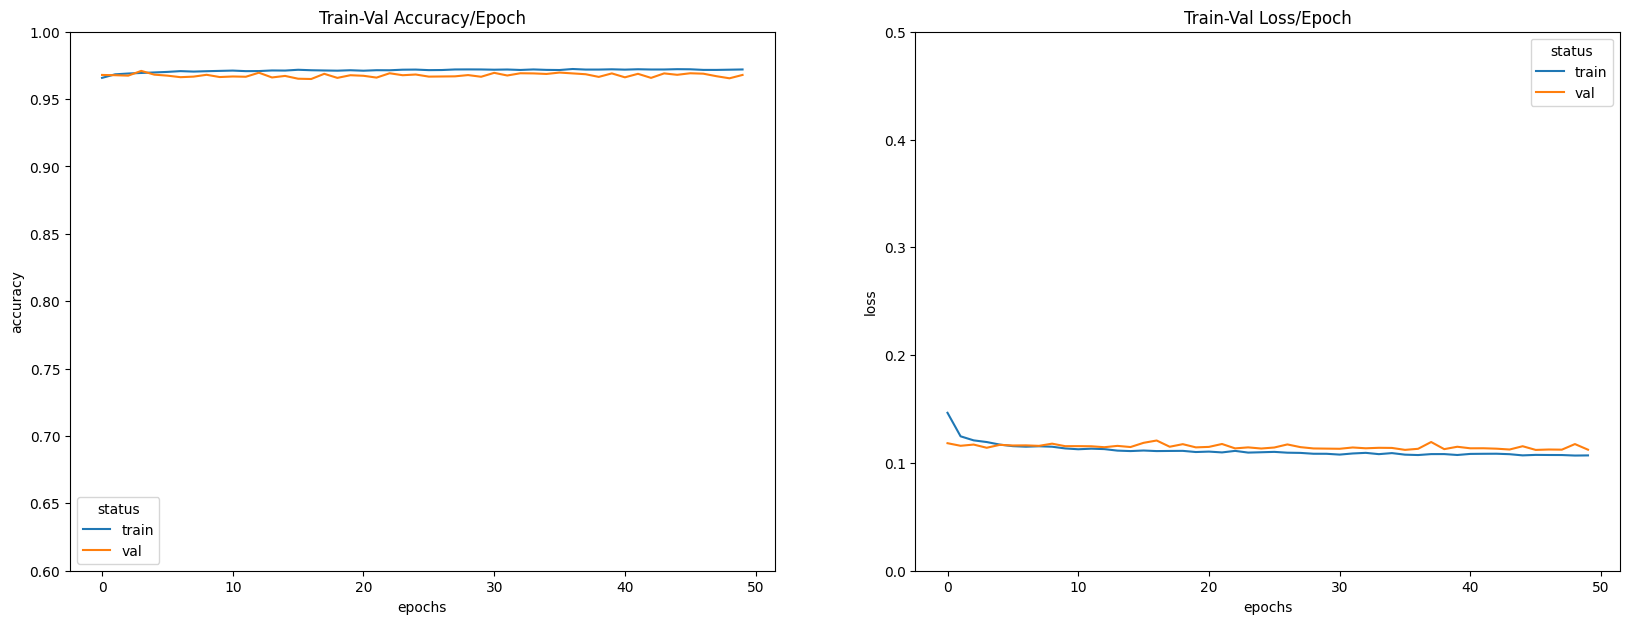

In [66]:
# Draw the plot
draw_plot(accuracy_stats, loss_stats)

In [67]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Test the model
y_pred_list = test_model(test_loader, model)

# test accuracy
print("accuracy of test data: ", accuracy_score(y_test_dt_predicted, y_pred_list))
print(classification_report(y_test_dt_predicted, y_pred_list, target_names=['Benign', 'Malicious'], digits=4))

accuracy of test data:  0.9662445505501349
              precision    recall  f1-score   support

      Benign     0.9674    0.9981    0.9825     22877
   Malicious     0.9089    0.3634    0.5192      1208

    accuracy                         0.9662     24085
   macro avg     0.9382    0.6807    0.7509     24085
weighted avg     0.9645    0.9662    0.9593     24085



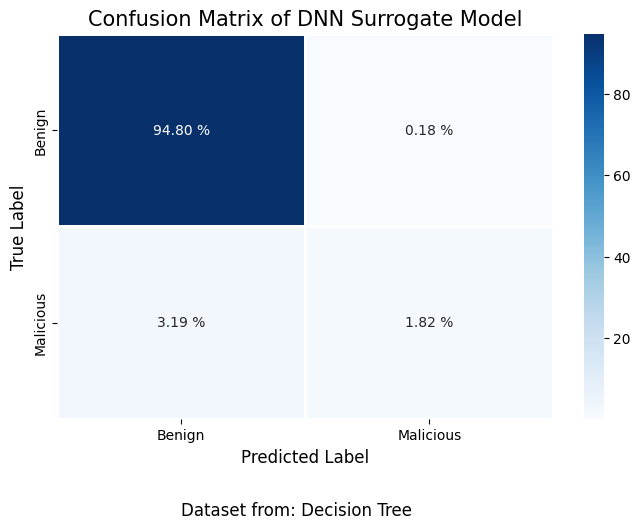

In [68]:
# draw confusion matrix
draw_confusion_matrix(y_test_dt_predicted, y_pred_list, model, 'DNN', 'Decision Tree')

### Train for Xgboost Predicted Data

In [69]:
train_dataset = ClassifierDataset(torch.tensor(np.array(X_train_xgb_predicted)).float(), torch.tensor(np.array(y_train_xgb_predicted)).long())
val_dataset = ClassifierDataset(torch.tensor(np.array(X_val_xgb_predicted)).float(), torch.tensor(np.array(y_val_xgb_predicted)).long())
test_dataset = ClassifierDataset(torch.tensor(np.array(X_test_xgb_predicted)).float(), torch.tensor(np.array(y_test_xgb_predicted)).long())

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, drop_last=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=1,drop_last=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=1,drop_last=True)

In [70]:
# Imports
import torch
import torch.nn.functional as F  # Parameterless functions, like (some) activation functions
import torchvision.datasets as datasets  # Standard datasets
import torchvision.transforms as transforms  # Transformations we can perform on our dataset for augmentation
from torch import optim  # For optimizers like SGD, Adam, etc.
from torch import nn  # All neural network modules
from torch.utils.data import (
    DataLoader,
)  # Gives easier dataset managment by creating mini batches etc.
from tqdm import tqdm  # For nice progress bar!
from datetime import datetime


# Initialize network
model = DNN(input_size=input_size, num_classes=num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# accuracy, loss status for each epoch
accuracy_stats = {
    'train': [],
    "val": []
}
loss_stats = {
    'train': [],
    "val": []
}

print("Begin training.")
best_vloss = 1000000
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
# Train Network
for epoch in range(num_epochs):
    # train model
    train_epoch_loss, train_epoch_acc = train_for_one_epoch(model, train_loader, val_loader, criterion, optimizer, num_epochs)

    # validate model
    with torch.no_grad():
        val_epoch_loss = 0
        val_epoch_acc = 0
        model.eval()
        for i, vdata in enumerate(val_loader):
            vinputs, vlabels = vdata
            voutputs = model(vinputs)
            val_loss = criterion(voutputs, vlabels)
            val_acc = (voutputs.argmax(1) == vlabels).float().sum() / len(vlabels)
            
            val_epoch_loss += val_loss.item()
            val_epoch_acc += val_acc.item()
    avg_vloss = val_epoch_loss/len(val_loader)


    # save the accuracy and loss for each epoch   
    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    loss_stats['val'].append(val_epoch_loss/len(val_loader))
    accuracy_stats['train'].append(train_epoch_acc/len(train_loader))
    accuracy_stats['val'].append(val_epoch_acc/len(val_loader))
    
    # Track best performance, and save the model's state
    if avg_vloss < best_vloss:
        best_vloss = avg_vloss
        model_path = '../surrogate_model/surrogate_DNN_model/surrogateDNN_model_fromXgboost_{}_{}'.format(timestamp, epoch) # target_model\target_DNN_model\binaryclass
        torch.save(model.state_dict(), model_path)                           
        torch.save(model, model_path + '.pth')    
        
    print(f'Epoch {epoch + 1}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f} | Train Acc: {train_epoch_acc/len(train_loader):.4f}| Val Acc: {val_epoch_acc/len(val_loader):.4f}')


# Check accuracy on training & test to see how good our model
print(f"Accuracy on training set: {check_accuracy(train_loader, model)*100:.2f}")
print(f"Accuracy on test set: {check_accuracy(test_loader, model)*100:.2f}")

Begin training.


  0%|          | 0/1354 [00:00<?, ?it/s]

100%|██████████| 1354/1354 [00:02<00:00, 602.04it/s]


Epoch 1: | Train Loss: 0.14140 | Val Loss: 0.10709 | Train Acc: 0.9597| Val Acc: 0.9659


100%|██████████| 1354/1354 [00:02<00:00, 618.04it/s]


Epoch 2: | Train Loss: 0.11227 | Val Loss: 0.10185 | Train Acc: 0.9669| Val Acc: 0.9667


100%|██████████| 1354/1354 [00:02<00:00, 618.83it/s]


Epoch 3: | Train Loss: 0.10522 | Val Loss: 0.09292 | Train Acc: 0.9682| Val Acc: 0.9674


100%|██████████| 1354/1354 [00:02<00:00, 609.71it/s]


Epoch 4: | Train Loss: 0.10098 | Val Loss: 0.08769 | Train Acc: 0.9690| Val Acc: 0.9677


100%|██████████| 1354/1354 [00:02<00:00, 634.01it/s]


Epoch 5: | Train Loss: 0.09832 | Val Loss: 0.08246 | Train Acc: 0.9691| Val Acc: 0.9682


100%|██████████| 1354/1354 [00:02<00:00, 628.15it/s]


Epoch 6: | Train Loss: 0.09544 | Val Loss: 0.08075 | Train Acc: 0.9699| Val Acc: 0.9677


100%|██████████| 1354/1354 [00:02<00:00, 621.01it/s]


Epoch 7: | Train Loss: 0.09358 | Val Loss: 0.07791 | Train Acc: 0.9705| Val Acc: 0.9674


100%|██████████| 1354/1354 [00:02<00:00, 625.00it/s]


Epoch 8: | Train Loss: 0.09204 | Val Loss: 0.07590 | Train Acc: 0.9703| Val Acc: 0.9676


100%|██████████| 1354/1354 [00:02<00:00, 621.45it/s]


Epoch 9: | Train Loss: 0.09020 | Val Loss: 0.07463 | Train Acc: 0.9710| Val Acc: 0.9729


100%|██████████| 1354/1354 [00:02<00:00, 624.54it/s]


Epoch 10: | Train Loss: 0.08911 | Val Loss: 0.07386 | Train Acc: 0.9721| Val Acc: 0.9683


100%|██████████| 1354/1354 [00:02<00:00, 616.85it/s]


Epoch 11: | Train Loss: 0.08980 | Val Loss: 0.07208 | Train Acc: 0.9719| Val Acc: 0.9692


100%|██████████| 1354/1354 [00:02<00:00, 611.14it/s]


Epoch 12: | Train Loss: 0.08718 | Val Loss: 0.06945 | Train Acc: 0.9721| Val Acc: 0.9700


100%|██████████| 1354/1354 [00:02<00:00, 621.91it/s]


Epoch 13: | Train Loss: 0.08697 | Val Loss: 0.07078 | Train Acc: 0.9724| Val Acc: 0.9690


100%|██████████| 1354/1354 [00:02<00:00, 624.40it/s]


Epoch 14: | Train Loss: 0.08542 | Val Loss: 0.06775 | Train Acc: 0.9729| Val Acc: 0.9749


100%|██████████| 1354/1354 [00:02<00:00, 629.47it/s]


Epoch 15: | Train Loss: 0.08456 | Val Loss: 0.06666 | Train Acc: 0.9732| Val Acc: 0.9755


100%|██████████| 1354/1354 [00:02<00:00, 605.41it/s]


Epoch 16: | Train Loss: 0.08417 | Val Loss: 0.06676 | Train Acc: 0.9733| Val Acc: 0.9748


100%|██████████| 1354/1354 [00:02<00:00, 627.87it/s]


Epoch 17: | Train Loss: 0.08291 | Val Loss: 0.06604 | Train Acc: 0.9736| Val Acc: 0.9738


100%|██████████| 1354/1354 [00:02<00:00, 629.63it/s]


Epoch 18: | Train Loss: 0.08206 | Val Loss: 0.06521 | Train Acc: 0.9738| Val Acc: 0.9764


100%|██████████| 1354/1354 [00:02<00:00, 627.58it/s]


Epoch 19: | Train Loss: 0.08393 | Val Loss: 0.06567 | Train Acc: 0.9740| Val Acc: 0.9755


100%|██████████| 1354/1354 [00:02<00:00, 629.04it/s]


Epoch 20: | Train Loss: 0.08129 | Val Loss: 0.06440 | Train Acc: 0.9740| Val Acc: 0.9752


100%|██████████| 1354/1354 [00:02<00:00, 634.35it/s]


Epoch 21: | Train Loss: 0.08157 | Val Loss: 0.06411 | Train Acc: 0.9733| Val Acc: 0.9754


100%|██████████| 1354/1354 [00:02<00:00, 623.82it/s]


Epoch 22: | Train Loss: 0.08039 | Val Loss: 0.06418 | Train Acc: 0.9746| Val Acc: 0.9760


100%|██████████| 1354/1354 [00:02<00:00, 624.20it/s]


Epoch 23: | Train Loss: 0.08130 | Val Loss: 0.06517 | Train Acc: 0.9747| Val Acc: 0.9688


100%|██████████| 1354/1354 [00:02<00:00, 631.37it/s]


Epoch 24: | Train Loss: 0.08014 | Val Loss: 0.06373 | Train Acc: 0.9744| Val Acc: 0.9750


100%|██████████| 1354/1354 [00:02<00:00, 619.25it/s]


Epoch 25: | Train Loss: 0.08152 | Val Loss: 0.06269 | Train Acc: 0.9742| Val Acc: 0.9756


100%|██████████| 1354/1354 [00:02<00:00, 626.17it/s]


Epoch 26: | Train Loss: 0.07922 | Val Loss: 0.06405 | Train Acc: 0.9751| Val Acc: 0.9757


100%|██████████| 1354/1354 [00:02<00:00, 629.92it/s]


Epoch 27: | Train Loss: 0.08085 | Val Loss: 0.06414 | Train Acc: 0.9743| Val Acc: 0.9696


100%|██████████| 1354/1354 [00:02<00:00, 628.17it/s]


Epoch 28: | Train Loss: 0.07959 | Val Loss: 0.06325 | Train Acc: 0.9750| Val Acc: 0.9745


100%|██████████| 1354/1354 [00:02<00:00, 634.64it/s]


Epoch 29: | Train Loss: 0.07925 | Val Loss: 0.06297 | Train Acc: 0.9749| Val Acc: 0.9755


100%|██████████| 1354/1354 [00:02<00:00, 616.29it/s]


Epoch 30: | Train Loss: 0.07921 | Val Loss: 0.06068 | Train Acc: 0.9751| Val Acc: 0.9764


100%|██████████| 1354/1354 [00:02<00:00, 625.16it/s]


Epoch 31: | Train Loss: 0.07808 | Val Loss: 0.06200 | Train Acc: 0.9750| Val Acc: 0.9757


100%|██████████| 1354/1354 [00:02<00:00, 624.45it/s]


Epoch 32: | Train Loss: 0.07903 | Val Loss: 0.06261 | Train Acc: 0.9751| Val Acc: 0.9762


100%|██████████| 1354/1354 [00:02<00:00, 632.27it/s]


Epoch 33: | Train Loss: 0.07803 | Val Loss: 0.06232 | Train Acc: 0.9755| Val Acc: 0.9759


100%|██████████| 1354/1354 [00:02<00:00, 627.67it/s]


Epoch 34: | Train Loss: 0.07854 | Val Loss: 0.06291 | Train Acc: 0.9755| Val Acc: 0.9755


100%|██████████| 1354/1354 [00:02<00:00, 624.24it/s]


Epoch 35: | Train Loss: 0.07624 | Val Loss: 0.06010 | Train Acc: 0.9752| Val Acc: 0.9771


100%|██████████| 1354/1354 [00:02<00:00, 617.23it/s]


Epoch 36: | Train Loss: 0.07741 | Val Loss: 0.05897 | Train Acc: 0.9755| Val Acc: 0.9763


100%|██████████| 1354/1354 [00:02<00:00, 634.27it/s]


Epoch 37: | Train Loss: 0.07779 | Val Loss: 0.05973 | Train Acc: 0.9759| Val Acc: 0.9769


100%|██████████| 1354/1354 [00:02<00:00, 629.20it/s]


Epoch 38: | Train Loss: 0.07616 | Val Loss: 0.05968 | Train Acc: 0.9758| Val Acc: 0.9761


100%|██████████| 1354/1354 [00:02<00:00, 627.58it/s]


Epoch 39: | Train Loss: 0.07703 | Val Loss: 0.05857 | Train Acc: 0.9761| Val Acc: 0.9766


100%|██████████| 1354/1354 [00:02<00:00, 615.99it/s]


Epoch 40: | Train Loss: 0.07645 | Val Loss: 0.05948 | Train Acc: 0.9761| Val Acc: 0.9776


100%|██████████| 1354/1354 [00:02<00:00, 584.99it/s]


Epoch 41: | Train Loss: 0.07730 | Val Loss: 0.06137 | Train Acc: 0.9758| Val Acc: 0.9753


100%|██████████| 1354/1354 [00:02<00:00, 611.04it/s]


Epoch 42: | Train Loss: 0.07658 | Val Loss: 0.05895 | Train Acc: 0.9757| Val Acc: 0.9715


100%|██████████| 1354/1354 [00:02<00:00, 570.50it/s]


Epoch 43: | Train Loss: 0.07665 | Val Loss: 0.05751 | Train Acc: 0.9760| Val Acc: 0.9767


100%|██████████| 1354/1354 [00:02<00:00, 617.34it/s]


Epoch 44: | Train Loss: 0.07723 | Val Loss: 0.05811 | Train Acc: 0.9762| Val Acc: 0.9775


100%|██████████| 1354/1354 [00:02<00:00, 625.08it/s]


Epoch 45: | Train Loss: 0.07497 | Val Loss: 0.06060 | Train Acc: 0.9764| Val Acc: 0.9757


100%|██████████| 1354/1354 [00:02<00:00, 603.62it/s]


Epoch 46: | Train Loss: 0.07689 | Val Loss: 0.05965 | Train Acc: 0.9762| Val Acc: 0.9759


100%|██████████| 1354/1354 [00:02<00:00, 578.13it/s]


Epoch 47: | Train Loss: 0.07494 | Val Loss: 0.06017 | Train Acc: 0.9764| Val Acc: 0.9759


100%|██████████| 1354/1354 [00:02<00:00, 602.90it/s]


Epoch 48: | Train Loss: 0.07565 | Val Loss: 0.05880 | Train Acc: 0.9765| Val Acc: 0.9758


100%|██████████| 1354/1354 [00:02<00:00, 594.03it/s]


Epoch 49: | Train Loss: 0.07544 | Val Loss: 0.05995 | Train Acc: 0.9763| Val Acc: 0.9770


100%|██████████| 1354/1354 [00:02<00:00, 580.77it/s]


Epoch 50: | Train Loss: 0.07606 | Val Loss: 0.05912 | Train Acc: 0.9765| Val Acc: 0.9771
Accuracy on training set: 97.57
Accuracy on test set: 97.60


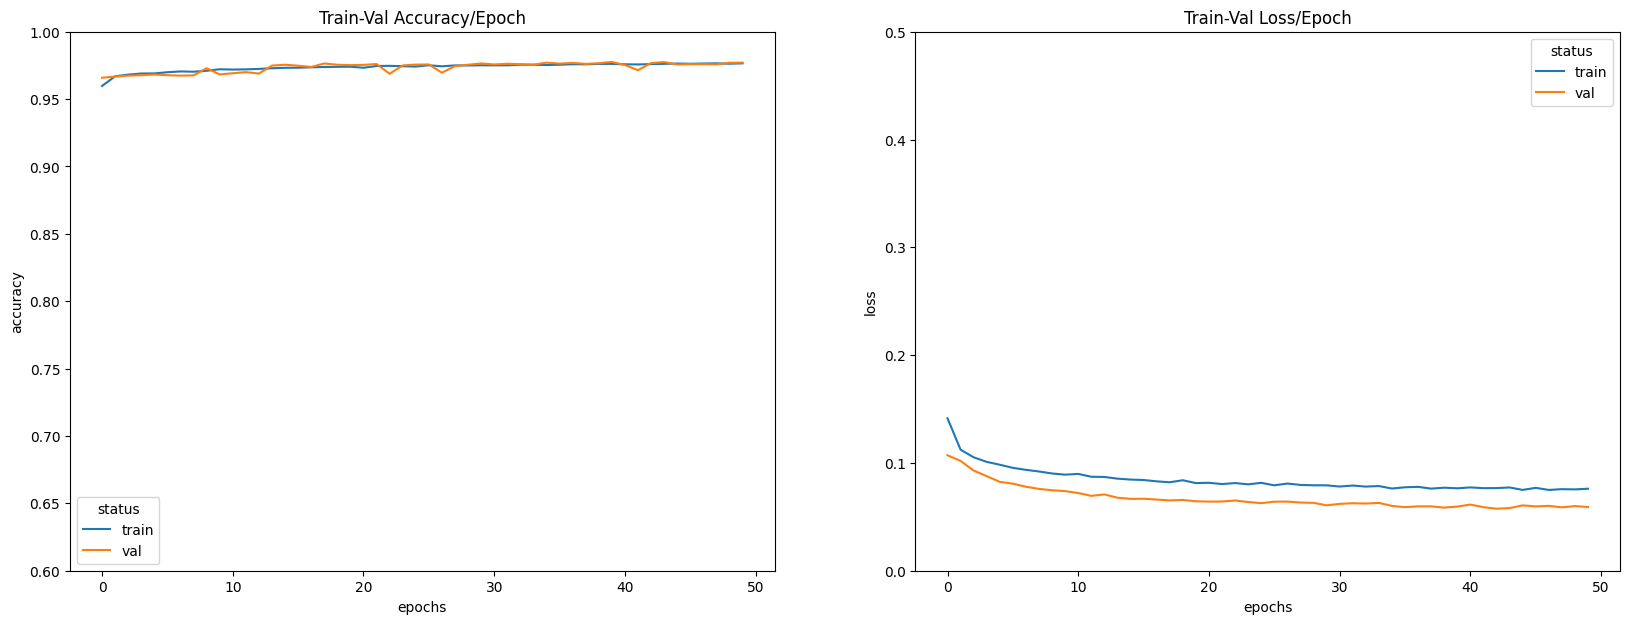

In [71]:
# Draw the plot
draw_plot(accuracy_stats, loss_stats)

In [72]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Test the model
y_pred_list = test_model(test_loader, model)

# test accuracy
print("accuracy of test data: ", accuracy_score(y_test_xgb_predicted, y_pred_list))
print(classification_report(y_test_xgb_predicted, y_pred_list, target_names=['Benign', 'Malicious'], digits=4))

accuracy of test data:  0.9760431804027403
              precision    recall  f1-score   support

      Benign     0.9798    0.9947    0.9872     22370
   Malicious     0.9141    0.7324    0.8132      1715

    accuracy                         0.9760     24085
   macro avg     0.9470    0.8635    0.9002     24085
weighted avg     0.9751    0.9760    0.9748     24085



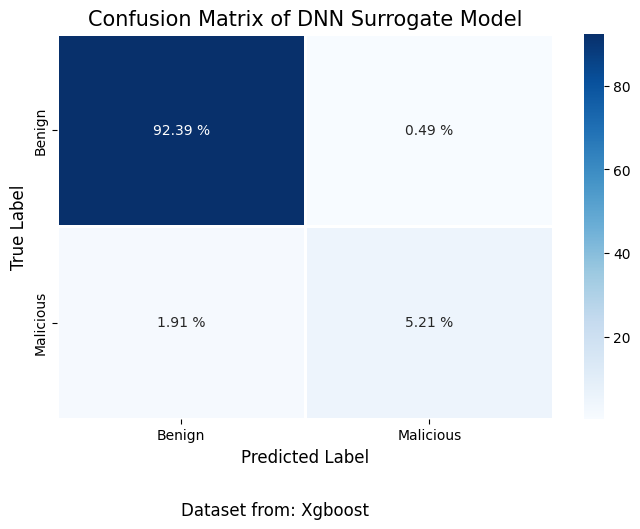

In [73]:
# draw confusion matrix
draw_confusion_matrix(y_test_xgb_predicted, y_pred_list, model, 'DNN', 'Xgboost')

### Train for DNN Predicted Data

In [74]:
train_dataset = ClassifierDataset(torch.tensor(np.array(X_train_dnn_predicted)).float(), torch.tensor(np.array(y_train_dnn_predicted)).long())
val_dataset = ClassifierDataset(torch.tensor(np.array(X_val_dnn_predicted)).float(), torch.tensor(np.array(y_val_dnn_predicted)).long())
test_dataset = ClassifierDataset(torch.tensor(np.array(X_test_dnn_predicted)).float(), torch.tensor(np.array(y_test_dnn_predicted)).long())

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, drop_last=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=1,drop_last=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=1,drop_last=True)

In [75]:
# Imports
import torch
import torch.nn.functional as F  # Parameterless functions, like (some) activation functions
import torchvision.datasets as datasets  # Standard datasets
import torchvision.transforms as transforms  # Transformations we can perform on our dataset for augmentation
from torch import optim  # For optimizers like SGD, Adam, etc.
from torch import nn  # All neural network modules
from torch.utils.data import (
    DataLoader,
)  # Gives easier dataset managment by creating mini batches etc.
from tqdm import tqdm  # For nice progress bar!
from datetime import datetime


# Initialize network
model = DNN(input_size=input_size, num_classes=num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# accuracy, loss status for each epoch
accuracy_stats = {
    'train': [],
    "val": []
}
loss_stats = {
    'train': [],
    "val": []
}

print("Begin training.")
best_vloss = 1000000
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
# Train Network
for epoch in range(num_epochs):
    # train model
    train_epoch_loss, train_epoch_acc = train_for_one_epoch(model, train_loader, val_loader, criterion, optimizer, num_epochs)

    # validate model
    with torch.no_grad():
        val_epoch_loss = 0
        val_epoch_acc = 0
        model.eval()
        for i, vdata in enumerate(val_loader):
            vinputs, vlabels = vdata
            voutputs = model(vinputs)
            val_loss = criterion(voutputs, vlabels)
            val_acc = (voutputs.argmax(1) == vlabels).float().sum() / len(vlabels)
            
            val_epoch_loss += val_loss.item()
            val_epoch_acc += val_acc.item()
    avg_vloss = val_epoch_loss/len(val_loader)


    # save the accuracy and loss for each epoch   
    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    loss_stats['val'].append(val_epoch_loss/len(val_loader))
    accuracy_stats['train'].append(train_epoch_acc/len(train_loader))
    accuracy_stats['val'].append(val_epoch_acc/len(val_loader))
    
    # Track best performance, and save the model's state
    if avg_vloss < best_vloss:
        best_vloss = avg_vloss
        model_path = '../surrogate_model/surrogate_DNN_model/surrogateDNN_model_fromDNN_{}_{}'.format(timestamp, epoch) # target_model\target_DNN_model\binaryclass
        torch.save(model.state_dict(), model_path)                           
        torch.save(model, model_path + '.pth')    
        
    print(f'Epoch {epoch + 1}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f} | Train Acc: {train_epoch_acc/len(train_loader):.4f}| Val Acc: {val_epoch_acc/len(val_loader):.4f}')


# Check accuracy on training & test to see how good our model
print(f"Accuracy on training set: {check_accuracy(train_loader, model)*100:.2f}")
print(f"Accuracy on test set: {check_accuracy(test_loader, model)*100:.2f}")

Begin training.


100%|██████████| 1354/1354 [00:02<00:00, 624.11it/s]


Epoch 1: | Train Loss: 0.29358 | Val Loss: 0.22554 | Train Acc: 0.8924| Val Acc: 0.9228


100%|██████████| 1354/1354 [00:02<00:00, 611.57it/s]


Epoch 2: | Train Loss: 0.23853 | Val Loss: 0.19493 | Train Acc: 0.9180| Val Acc: 0.9333


100%|██████████| 1354/1354 [00:02<00:00, 626.80it/s]


Epoch 3: | Train Loss: 0.21504 | Val Loss: 0.17394 | Train Acc: 0.9256| Val Acc: 0.9368


100%|██████████| 1354/1354 [00:02<00:00, 604.53it/s]


Epoch 4: | Train Loss: 0.20319 | Val Loss: 0.15961 | Train Acc: 0.9303| Val Acc: 0.9394


100%|██████████| 1354/1354 [00:02<00:00, 581.97it/s]


Epoch 5: | Train Loss: 0.19470 | Val Loss: 0.15498 | Train Acc: 0.9325| Val Acc: 0.9387


100%|██████████| 1354/1354 [00:02<00:00, 606.10it/s]


Epoch 6: | Train Loss: 0.19146 | Val Loss: 0.14980 | Train Acc: 0.9348| Val Acc: 0.9405


100%|██████████| 1354/1354 [00:02<00:00, 609.35it/s]


Epoch 7: | Train Loss: 0.18474 | Val Loss: 0.14368 | Train Acc: 0.9365| Val Acc: 0.9427


100%|██████████| 1354/1354 [00:02<00:00, 614.05it/s]


Epoch 8: | Train Loss: 0.17925 | Val Loss: 0.13991 | Train Acc: 0.9384| Val Acc: 0.9441


100%|██████████| 1354/1354 [00:02<00:00, 602.53it/s]


Epoch 9: | Train Loss: 0.17724 | Val Loss: 0.13375 | Train Acc: 0.9394| Val Acc: 0.9441


100%|██████████| 1354/1354 [00:02<00:00, 612.33it/s]


Epoch 10: | Train Loss: 0.17285 | Val Loss: 0.13449 | Train Acc: 0.9410| Val Acc: 0.9434


100%|██████████| 1354/1354 [00:02<00:00, 611.58it/s]


Epoch 11: | Train Loss: 0.17466 | Val Loss: 0.13956 | Train Acc: 0.9402| Val Acc: 0.9434


100%|██████████| 1354/1354 [00:02<00:00, 607.36it/s]


Epoch 12: | Train Loss: 0.17346 | Val Loss: 0.13139 | Train Acc: 0.9407| Val Acc: 0.9455


100%|██████████| 1354/1354 [00:02<00:00, 607.35it/s]


Epoch 13: | Train Loss: 0.16933 | Val Loss: 0.13210 | Train Acc: 0.9425| Val Acc: 0.9456


100%|██████████| 1354/1354 [00:02<00:00, 590.18it/s]


Epoch 14: | Train Loss: 0.16849 | Val Loss: 0.12544 | Train Acc: 0.9425| Val Acc: 0.9456


100%|██████████| 1354/1354 [00:02<00:00, 613.94it/s]


Epoch 15: | Train Loss: 0.16375 | Val Loss: 0.12536 | Train Acc: 0.9443| Val Acc: 0.9463


100%|██████████| 1354/1354 [00:02<00:00, 609.12it/s]


Epoch 16: | Train Loss: 0.16252 | Val Loss: 0.11994 | Train Acc: 0.9447| Val Acc: 0.9485


100%|██████████| 1354/1354 [00:02<00:00, 606.90it/s]


Epoch 17: | Train Loss: 0.16544 | Val Loss: 0.12516 | Train Acc: 0.9440| Val Acc: 0.9462


100%|██████████| 1354/1354 [00:02<00:00, 619.37it/s]


Epoch 18: | Train Loss: 0.16563 | Val Loss: 0.12108 | Train Acc: 0.9443| Val Acc: 0.9482


100%|██████████| 1354/1354 [00:02<00:00, 598.01it/s]


Epoch 19: | Train Loss: 0.15772 | Val Loss: 0.11923 | Train Acc: 0.9463| Val Acc: 0.9484


100%|██████████| 1354/1354 [00:02<00:00, 618.58it/s]


Epoch 20: | Train Loss: 0.15862 | Val Loss: 0.11471 | Train Acc: 0.9461| Val Acc: 0.9497


100%|██████████| 1354/1354 [00:02<00:00, 594.37it/s]


Epoch 21: | Train Loss: 0.15580 | Val Loss: 0.11721 | Train Acc: 0.9468| Val Acc: 0.9492


100%|██████████| 1354/1354 [00:02<00:00, 619.99it/s]


Epoch 22: | Train Loss: 0.15539 | Val Loss: 0.11861 | Train Acc: 0.9466| Val Acc: 0.9509


100%|██████████| 1354/1354 [00:02<00:00, 616.68it/s]


Epoch 23: | Train Loss: 0.15767 | Val Loss: 0.12369 | Train Acc: 0.9468| Val Acc: 0.9488


100%|██████████| 1354/1354 [00:02<00:00, 620.10it/s]


Epoch 24: | Train Loss: 0.15675 | Val Loss: 0.11541 | Train Acc: 0.9470| Val Acc: 0.9564


100%|██████████| 1354/1354 [00:02<00:00, 612.11it/s]


Epoch 25: | Train Loss: 0.15450 | Val Loss: 0.11121 | Train Acc: 0.9477| Val Acc: 0.9507


100%|██████████| 1354/1354 [00:02<00:00, 620.92it/s]


Epoch 26: | Train Loss: 0.15314 | Val Loss: 0.11857 | Train Acc: 0.9481| Val Acc: 0.9497


100%|██████████| 1354/1354 [00:02<00:00, 631.68it/s]


Epoch 27: | Train Loss: 0.15119 | Val Loss: 0.11588 | Train Acc: 0.9486| Val Acc: 0.9477


100%|██████████| 1354/1354 [00:02<00:00, 621.22it/s]


Epoch 28: | Train Loss: 0.15356 | Val Loss: 0.11463 | Train Acc: 0.9482| Val Acc: 0.9517


100%|██████████| 1354/1354 [00:02<00:00, 625.75it/s]


Epoch 29: | Train Loss: 0.15207 | Val Loss: 0.11375 | Train Acc: 0.9486| Val Acc: 0.9491


100%|██████████| 1354/1354 [00:02<00:00, 624.78it/s]


Epoch 30: | Train Loss: 0.15125 | Val Loss: 0.11170 | Train Acc: 0.9490| Val Acc: 0.9511


100%|██████████| 1354/1354 [00:02<00:00, 630.22it/s]


Epoch 31: | Train Loss: 0.15088 | Val Loss: 0.10621 | Train Acc: 0.9485| Val Acc: 0.9555


100%|██████████| 1354/1354 [00:02<00:00, 622.06it/s]


Epoch 32: | Train Loss: 0.14837 | Val Loss: 0.10864 | Train Acc: 0.9498| Val Acc: 0.9529


100%|██████████| 1354/1354 [00:02<00:00, 635.02it/s]


Epoch 33: | Train Loss: 0.15142 | Val Loss: 0.10918 | Train Acc: 0.9487| Val Acc: 0.9562


100%|██████████| 1354/1354 [00:02<00:00, 631.69it/s]


Epoch 34: | Train Loss: 0.14883 | Val Loss: 0.10946 | Train Acc: 0.9495| Val Acc: 0.9528


100%|██████████| 1354/1354 [00:02<00:00, 624.95it/s]


Epoch 35: | Train Loss: 0.14739 | Val Loss: 0.10956 | Train Acc: 0.9505| Val Acc: 0.9509


100%|██████████| 1354/1354 [00:02<00:00, 627.23it/s]


Epoch 36: | Train Loss: 0.15285 | Val Loss: 0.11582 | Train Acc: 0.9494| Val Acc: 0.9472


100%|██████████| 1354/1354 [00:02<00:00, 636.46it/s]


Epoch 37: | Train Loss: 0.14870 | Val Loss: 0.11114 | Train Acc: 0.9498| Val Acc: 0.9488


100%|██████████| 1354/1354 [00:02<00:00, 634.05it/s]


Epoch 38: | Train Loss: 0.14687 | Val Loss: 0.11807 | Train Acc: 0.9507| Val Acc: 0.9497


100%|██████████| 1354/1354 [00:02<00:00, 628.37it/s]


Epoch 39: | Train Loss: 0.14733 | Val Loss: 0.10678 | Train Acc: 0.9501| Val Acc: 0.9552


100%|██████████| 1354/1354 [00:02<00:00, 632.60it/s]


Epoch 40: | Train Loss: 0.14631 | Val Loss: 0.10514 | Train Acc: 0.9505| Val Acc: 0.9538


100%|██████████| 1354/1354 [00:02<00:00, 633.90it/s]


Epoch 41: | Train Loss: 0.14584 | Val Loss: 0.10863 | Train Acc: 0.9508| Val Acc: 0.9500


100%|██████████| 1354/1354 [00:02<00:00, 628.56it/s]


Epoch 42: | Train Loss: 0.14476 | Val Loss: 0.10542 | Train Acc: 0.9511| Val Acc: 0.9515


100%|██████████| 1354/1354 [00:02<00:00, 636.72it/s]


Epoch 43: | Train Loss: 0.14621 | Val Loss: 0.10476 | Train Acc: 0.9513| Val Acc: 0.9565


100%|██████████| 1354/1354 [00:02<00:00, 630.03it/s]


Epoch 44: | Train Loss: 0.14261 | Val Loss: 0.10576 | Train Acc: 0.9519| Val Acc: 0.9504


100%|██████████| 1354/1354 [00:02<00:00, 639.36it/s]


Epoch 45: | Train Loss: 0.14549 | Val Loss: 0.10593 | Train Acc: 0.9513| Val Acc: 0.9533


100%|██████████| 1354/1354 [00:02<00:00, 634.37it/s]


Epoch 46: | Train Loss: 0.14345 | Val Loss: 0.10477 | Train Acc: 0.9510| Val Acc: 0.9519


100%|██████████| 1354/1354 [00:02<00:00, 576.34it/s]


Epoch 47: | Train Loss: 0.14246 | Val Loss: 0.10292 | Train Acc: 0.9529| Val Acc: 0.9555


100%|██████████| 1354/1354 [00:02<00:00, 609.18it/s]


Epoch 48: | Train Loss: 0.14417 | Val Loss: 0.10432 | Train Acc: 0.9521| Val Acc: 0.9521


100%|██████████| 1354/1354 [00:02<00:00, 609.50it/s]


Epoch 49: | Train Loss: 0.14456 | Val Loss: 0.10376 | Train Acc: 0.9512| Val Acc: 0.9530


100%|██████████| 1354/1354 [00:02<00:00, 618.20it/s]


Epoch 50: | Train Loss: 0.14261 | Val Loss: 0.10560 | Train Acc: 0.9522| Val Acc: 0.9558
Accuracy on training set: 95.65
Accuracy on test set: 95.62


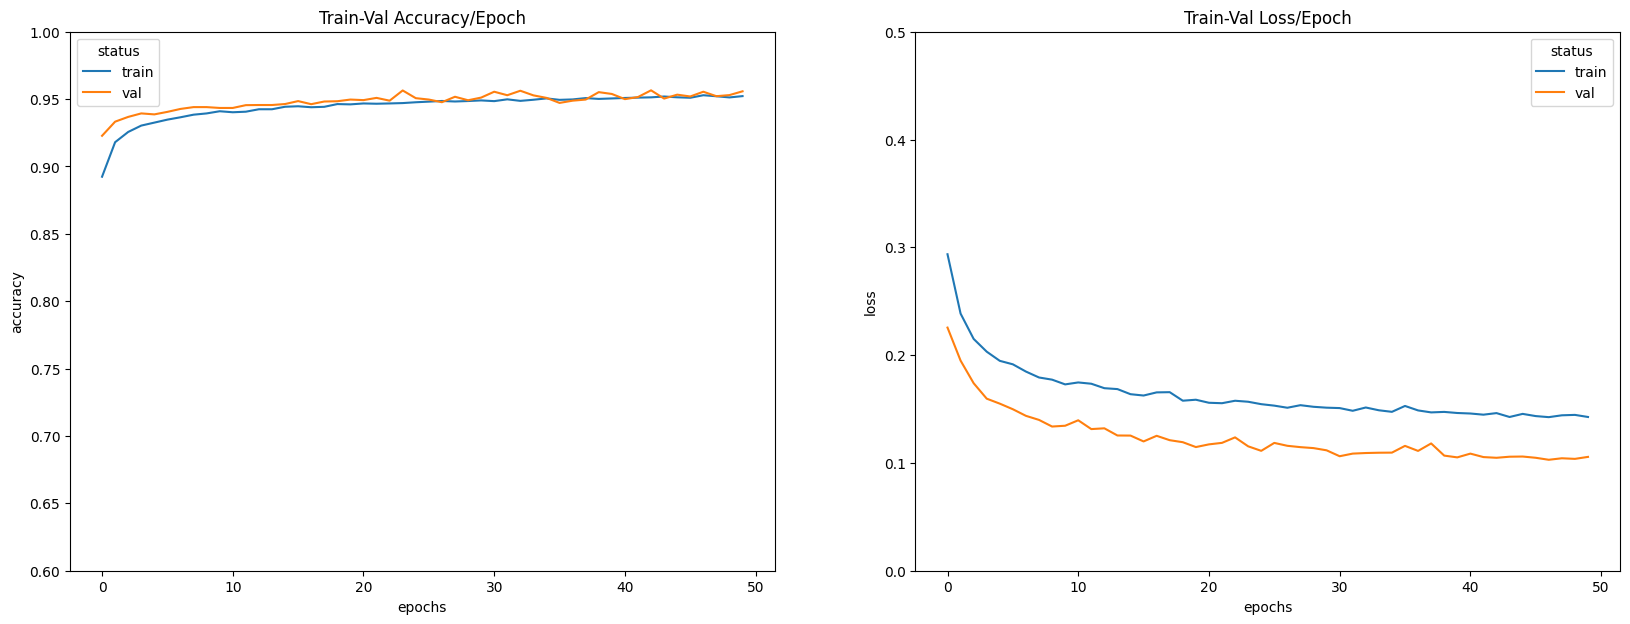

In [76]:
# Draw the plot
draw_plot(accuracy_stats, loss_stats)

In [77]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Test the model
y_pred_list = test_model(test_loader, model)

# test accuracy
print("accuracy of test data: ", accuracy_score(y_test_dnn_predicted, y_pred_list))
print(classification_report(y_test_dnn_predicted, y_pred_list, target_names=['Benign', 'Malicious'], digits=4))

accuracy of test data:  0.956238322607432
              precision    recall  f1-score   support

      Benign     0.9572    0.9905    0.9736     19585
   Malicious     0.9513    0.8071    0.8733      4500

    accuracy                         0.9562     24085
   macro avg     0.9542    0.8988    0.9234     24085
weighted avg     0.9561    0.9562    0.9548     24085



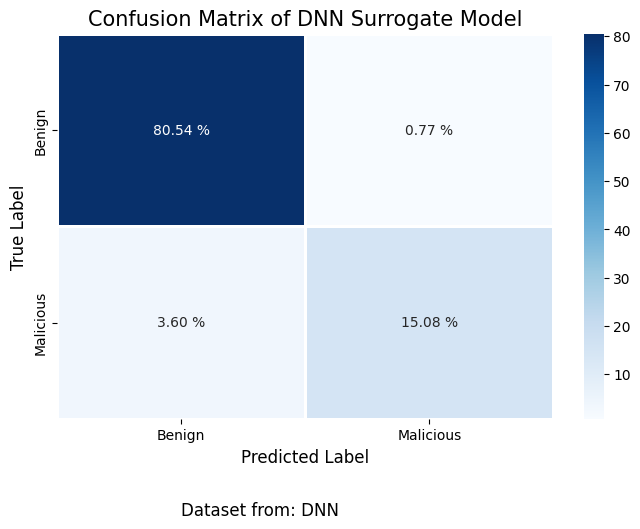

In [78]:
# draw confusion matrix
draw_confusion_matrix(y_test_dnn_predicted, y_pred_list, model, 'DNN', 'DNN')